In [1]:
from wandb.sdk import lib
import wandb
#from wandb.keras import WandbCallback
# wandb.init(project="qc_casting_products", entity="zubeyir_oflaz")
#from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())

In [2]:
import tensorflow as tf
from tensorflow.python.client import device_lib
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.metrics import classification_report,confusion_matrix

#%matplotlib inline
#print(device_lib.list_local_devices())
#print(tf.__version__)
#print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
#tf.config.list_physical_devices('GPU')


In [3]:
from keras.applications import MobileNetV2
#from keras.applications import preprocess_input
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout

model = MobileNetV2(include_top=False, input_shape=(300,300,3))
for layer in model.layers:
    layer.trainable = False

flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(32, activation='relu')(flat1)
#do_1 = Dropout(0.3)(class1)
#class2 = Dense(256, activation='relu')(do_1)
#do_2 = Dropout(0.3)(class2)
output = Dense(1, activation='sigmoid')(class1)

model = Model(inputs = model.inputs, outputs = output)

In [4]:
learning_rate = 0.001
epoch = 15
batch_size = 128
#wandb.config = {
#  "learning_rate": learning_rate,
#  "epochs": epoch,
#  "batch_size": batch_size
#}


In [5]:
train_dir = "./casting_dataset/casting_data/casting_data/train/"
test_dir = "./casting_dataset/casting_data/casting_data/test/"
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img ,img_to_array

image_gen = ImageDataGenerator(rescale=1/255) # Rescale by normalizing
image_shape = (224,224,1)

#Binary classification of images using the built-in function
train_set = image_gen.flow_from_directory(train_dir,
                                               target_size=image_shape[:2],
                                                color_mode="rgb",
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=True)

test_set = image_gen.flow_from_directory(test_dir,
                                               target_size=image_shape[:2],
                                               color_mode="rgb",
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout

model = InceptionV3(include_top=False, input_shape=(300,300,3))
for layer in model.layers:
    layer.trainable = False

flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(512, activation='relu')(flat1)
do_1 = Dropout(0.3)(class1)
class2 = Dense(256, activation='relu')(do_1)
do_2 = Dropout(0.3)(class2)
output = Dense(1, activation='sigmoid')(do_2)

model = Model(inputs = model.inputs, outputs = output)

from keras.applications import MobileNetV2
#from keras.applications import preprocess_input
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout

model = MobileNetV2(include_top=False, input_shape=(300,300,3))
for layer in model.layers:
    layer.trainable = False

flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(32, activation='relu')(flat1)
#do_1 = Dropout(0.3)(class1)
#class2 = Dense(256, activation='relu')(do_1)
#do_2 = Dropout(0.3)(class2)
output = Dense(1, activation='sigmoid')(class1)

model = Model(inputs = model.inputs, outputs = output)

In [6]:
from keras.applications import MobileNetV2
#from keras.applications import preprocess_input
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout

model = MobileNetV2(include_top=False, input_shape=(224,224,3))
for layer in model.layers:
    layer.trainable = False

model_end = model.output
model_end = Flatten(name="flatten")(model_end)
model_end = Dense(128, activation='relu')(model_end)
model_end = Dropout(0.5)(model_end)
model_end = Dense(32, activation='relu')(model_end)
model_end = Dropout(0.3)(model_end)
#do_1 = Dropout(0.3)(class1)
#class2 = Dense(256, activation='relu')(do_1)
#do_2 = Dropout(0.3)(class2)
output_layer = Dense(1, activation='sigmoid')(model_end)

model = Model(inputs = model.inputs, outputs = output_layer)

In [7]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=5)
from sklearn.preprocessing import LabelEncoder
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [8]:
with tf.device('/gpu:0'):
    trial = model.fit(train_set, epochs = epoch, validation_data = test_set,callbacks=[early_stop])

Epoch 1/15
52/52 [==============================] - 49s 950ms/step - loss: 1.4589 - accuracy: 0.7472 - val_loss: 0.0754 - val_accuracy: 0.9762
Epoch 2/15
52/52 [==============================] - 20s 377ms/step - loss: 0.1573 - accuracy: 0.9319 - val_loss: 0.0508 - val_accuracy: 0.9902
Epoch 3/15
52/52 [==============================] - 19s 362ms/step - loss: 0.0957 - accuracy: 0.9588 - val_loss: 0.0187 - val_accuracy: 0.9972
Epoch 4/15
52/52 [==============================] - 19s 361ms/step - loss: 0.0791 - accuracy: 0.9689 - val_loss: 0.0214 - val_accuracy: 0.9944
Epoch 5/15
52/52 [==============================] - 19s 362ms/step - loss: 0.0781 - accuracy: 0.9701 - val_loss: 0.0165 - val_accuracy: 0.9958
Epoch 6/15
52/52 [==============================] - 19s 360ms/step - loss: 0.0597 - accuracy: 0.9748 - val_loss: 0.0156 - val_accuracy: 0.9958
Epoch 7/15
52/52 [==============================] - 19s 364ms/step - loss: 0.0491 - accuracy: 0.9839 - val_loss: 0.0157 - val_accuracy: 0.9958

In [9]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

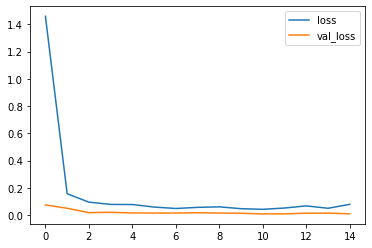

In [10]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

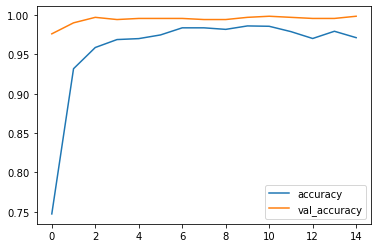

In [11]:
losses[['accuracy','val_accuracy']].plot()

In [12]:
pred_probability = model.predict_generator(test_set)
predictions = pred_probability > 0.96
print(classification_report(test_set.classes,predictions))

Instructions for updating:
Please use Model.predict, which supports generators.
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       453
           1       1.00      0.93      0.96       262

    accuracy                           0.97       715
   macro avg       0.98      0.96      0.97       715
weighted avg       0.97      0.97      0.97       715



<AxesSubplot:>

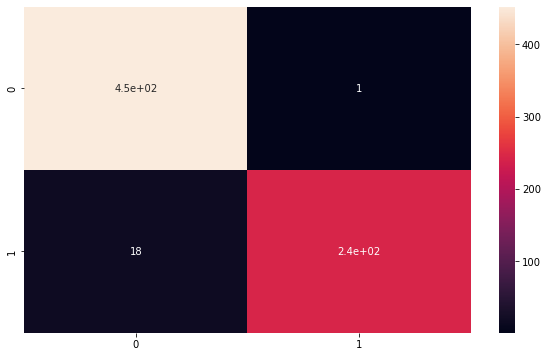

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(test_set.classes,predictions),annot=True)

In [14]:

# ... Define a model

#model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[WandbCallback()])